### Ejercicio 1
El objetivo de las bases es que realicemos un modelo de clasificación para poder contestar la siguiente pregunta:

      ¿Damos un crédito bancario o no?

Para empezar con la exploración de la base, tendrán que generar un análisis descriptivo de la información que les compartiré:
 1.- Los campos _id_ que son los identificadores de la información.
 2.- base_ini_interna
 3.- base_ini_parte1
 4.- base_ini_externa
 5.- bases de comportamiento
 6.- base_inversión, es una variable simulada de una gamma, es
 7.- Cuando una variable es categórica, está implícito en el nombre de la base. No tenemos un diccionario, simplemente que son categóricas.
 8.- El resto entonces son continuas. Es decir, los nombre estám enmascarados, ni siquiera yo sé qué significan.
 

¿Cómo hago los cruces? Exploren la información.
¿Qué análisis puedo realizar? Exploren ustedes, apóyense de los comportamientos de los ids.
Pero... ¿Las preguntas son abiertas? Así es, quiero que exploren. Hay bases que vienen en csv y otras en txt. Vean como tratarlas.

##### Primero, vamos a abrir las bases compartidas

In [225]:
# Importamos la libreria de pandas para la lectura de archivos
import pandas as pd
import xlrd
import os
import numpy as np
import matplotlib.pyplot as plt

#### Leemos los archivos txt 

In [226]:
base_comportamiento_2=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_comportamiento_2.txt")
base_comportamiento_2.head()

,num_caso mes_informacion Tiempo_aparicion
0,"1 ""2016-04-01 00:00:00"" 0.0"
1,"1 ""2016-05-01 00:00:00"" 1.0"
2,"1 ""2016-06-01 00:00:00"" 2.0"
3,"1 ""2016-07-01 00:00:00"" 3.0"
4,"1 ""2016-08-01 00:00:00"" 4.0"


In [227]:
base_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 1 columns):
 #   Column                                     Non-Null Count    Dtype 
---  ------                                     --------------    ----- 
 0   num_caso mes_informacion Tiempo_aparicion  1455536 non-null  object
dtypes: object(1)
memory usage: 11.1+ MB


In [228]:
base_ini_externa=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_ini_externa.txt")
base_ini_externa.head()

,_id_ comp_externo1 comp_externo2 comp_externo3 comp_externo4
0,78213 260.8695652173913 25.85463947141626 56.0...
1,76457 40.57971014492754 2.872737719046251 62.0...
2,40666 119.0 -230.0
3,8329 349.27536231884056 34.61648951450733 94.0...
4,68389 276.81159420289856 27.4346452168917 125....


In [229]:
base_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   _id_ comp_externo1 comp_externo2 comp_externo3 comp_externo4  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [230]:
base_inversion=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/base_inversion.txt")
base_inversion.head()

,_id2_ inversion
0,1758511 0.04103850641773629
1,1572947 77.42213535589265
2,1051836 90.53995332555427
3,1223255 90.20501750291714
4,1894602 1.0713535589264878


In [231]:
base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id2_ inversion  17536 non-null  object
dtypes: object(1)
memory usage: 137.1+ KB


In [232]:
bd_inicio_parte1=pd.read_csv("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/bd_inicio_parte1.txt")
bd_inicio_parte1.head()

,_id_ comp_interno4
0,78213 58.0
1,76457 45.0
2,40666 45.0
3,8329 59.0
4,68389 67.0


In [233]:
bd_inicio_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id_ comp_interno4  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


#### Notemos que los archivos txt no vienen separados por comas, por lo que será necesario editar su contenido para poder trabajar con las bases de manera adecuada.

In [234]:
# Antes que nada obtenemos el directorio en el que estamos trabajando
os.getcwd()
# como no es el directorio en donde tenemos guardados los archivos, procedemos a actualizar
os.chdir("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/")

In [235]:
os.getcwd()

'C:\\Users\\alexe\\OneDrive\\Escritorio\\Titulacion\\SeminarioEstadisticaI\\Tarea1'

In [236]:
nombre = "base_comportamiento_2.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    


#### Imprimimos el archivo creado que es con el que trabajaremos en adelante.

In [237]:
base_comportamiento_2=pd.read_csv("base_comportamiento_2final.txt")
base_comportamiento_2.head()

,num_caso,mes_informacion,Tiempo_aparicion
0,1,"2016-04-01,00:00:00",0.0
1,1,"2016-05-01,00:00:00",1.0
2,1,"2016-06-01,00:00:00",2.0
3,1,"2016-07-01,00:00:00",3.0
4,1,"2016-08-01,00:00:00",4.0


In [238]:
base_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455479 entries, 0 to 1455478
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455479 non-null  int64  
 1   mes_informacion   1455479 non-null  object 
 2   Tiempo_aparicion  1455479 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


Nota: como debemos hacer el mismo tratamiento para los archivos txt restantes, las siguientes lineas de codigo seran un 
"copy-paste" de la explicacion anterior:

In [239]:
nombre = "base_ini_externa.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    
nombre = "base_inversion.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.
    
nombre = "bd_inicio_parte1.txt" #nombre del archivo txt 
nuevonombre = nombre.replace(".txt","") #eliminamos la extensión ".txt" del nombre de nuestro archivo
nuevonombre = nuevonombre + "final.txt" #para distinguir entre el no editado y el archivo con el que se va a trabajar
# agregamos al nombre del archivo el texto "final" y volvemos a añadir la extensión ".txt"
# Ahora si, comenzamos a crear el archivo final
modificado = open(nuevonombre,'w') # aqui estamos creando un nuevo archivo .txt que sera el modificado, en principio este .txt
# es un archivo vacio
lectura = open(nombre,'r') # abro el archivo original para trabajar en el 

for x in lectura:
    xf = x.replace(" ",",") # cambiamos los espacios entre el texto por comas 
    modificado.write(xf) # escribo en el archivo en blanco las mismas filas del original pero esta vez con comas para separar
    # los valores de las columnas.

In [240]:
base_ini_externa=pd.read_csv("base_ini_externafinal.txt")
base_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [241]:
base_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   comp_externo1  47831 non-null  float64
 2   comp_externo2  44410 non-null  float64
 3   comp_externo3  49994 non-null  float64
 4   comp_externo4  50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [242]:
base_inversion=pd.read_csv("base_inversionfinal.txt")
base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [243]:
base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id2_      17536 non-null  int64  
 1   inversion  17536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 274.1 KB


In [244]:
bd_inicio_parte1=pd.read_csv("bd_inicio_parte1final.txt")
bd_inicio_parte1.head()

,_id_,comp_interno4
0,78213,58.0
1,76457,45.0
2,40666,45.0
3,8329,59.0
4,68389,67.0


In [245]:
bd_inicio_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49651 entries, 0 to 49650
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           49651 non-null  int64  
 1   comp_interno4  49651 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 775.9 KB


In [246]:
base_comportamiento_3 = pd.read_csv("base_comportamiento_3.csv")
base_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0


In [247]:
base_comportamiento_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   comportamiento_j  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [248]:
base_ini_interna = pd.read_csv("base_ini_interna.csv")
base_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [249]:
base_ini_interna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [250]:
base_ini_parte1 = pd.read_csv("base_ini_parte1.csv")
base_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [251]:
base_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


#### Como ya tenemos las bases en el formato correcto, continuarmos con un breve análisis descriptivo de la información, recordemos que el objetivo final del ejercicio es crear un modelo de clasificacion que nos permita saber si dar un credito bancario o no. 

Por un lado, notemos que base_ini_parte1 nos permite relacionar aquellas tablas que solo cuenten con alguno de estos atributos, mientras que conforme a lo visto en clase, sabemos que las bases de comportamiento 2 y 3 nos indican el tiempo de 'deuda' que tienen los distintos clientes, estas bases en principio parecen ser las que nos permitiran establecer un criterio para asignar credito, pues en general, buscamos clientes que tengan un buen historial crediticio, es decir, que los tiempos de aparicion en el comportamiento j sean bajos, pues esto nos indica que seran buenos pagadores.

Notemos que los nombres de la ultima columna en las bases de comportamiento 2 y 3 son distintos, por un lado, la base 2 nos permite conocer el tiempo que el credito ha estado vigente mientras que la base 3, nos permite identificar cuando no se ha realizado el pago, es decir, se tiene un adeudo, un comienzo para el analisis de estas bases sera unir la columna faltante comportamiento_j.

##### Primero, notemos que contamos con dos tipos de identificadores:
###### "_id_"
###### "_id2_"
los cuales nos permitiran relacionarlos a traves de la base "base_ini_parte1"
###### NOTA: Dado que no contamos con una explicacion detallada del significado de cada variable, se analizaran los cruces de tablas bajo la informacion proporcionada en clases sobre las mismas

In [273]:
# Ahora, comencemos analizando el contenido de 'base_ini_interna' y 'base_ini_externa'
# usamos la funcion fillna(0) para evitar errores debido a los valores faltantes
base_ini_interna=base_ini_interna.fillna(0)
base_ini_interna

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0
...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0
49997,44847,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0
49998,87200,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0


In [276]:
# notemos que la base 'base_inicio_parte1' esta conformada por el id y la columna comp_interno4 de la base 'base_ini_interna'
# por lo que no nos aporta mayor informacion; motivo por el cual no se le dara seguimiento a su analisis. 
bd_inicio_parte1

,_id_,comp_interno4
0,78213,58.0
1,76457,45.0
2,40666,45.0
3,8329,59.0
4,68389,67.0
...,...,...
49646,51879,44.0
49647,19124,57.0
49648,65586,67.0
49649,49480,67.0


In [274]:
base_ini_externa=base_ini_externa.fillna(0)
base_ini_externa

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,0.000000,0.000000,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0
...,...,...,...,...,...
49995,78795,140.579710,13.932778,95.0,-230.0
49996,9126,188.405797,9.652399,114.0,-230.0
49997,44847,434.782609,33.323758,124.0,-230.0
49998,87200,919.130435,57.454754,108.0,-230.0


Notemos que podemos unir las bases iniciales interna y externa, por un lado, sabemos que la base interna refiere a la captacion de informacion del banco sobre los clientes que estan solicitando algun producto mientras que la base inicial externa contiene informacion de estos clientes sobre que tan buenos son pagando; es como una especie de base de buró de crédito.

In [305]:
# Hacemos el cruce de las bases iniciales
base_inicial_int_ext = pd.merge(base_ini_interna,base_ini_externa, on="_id_")
base_inicial_int_ext

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,0.000000,0.000000,119.0,-230.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0,140.579710,13.932778,95.0,-230.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0
49997,44847,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0,434.782609,33.323758,124.0,-230.0
49998,87200,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0,919.130435,57.454754,108.0,-230.0


Hasta donde sabemos, las columnas de comportamiento interno 3 y 4 hacen referencia al tipo de producto que se estan solicitando, por lo que resulta conveniente analizar cuales son los productos mas solicitados.

Distribucion del comportamiento de la variable comportamiento_interno_3
Se cuenta con un maximo de : 32.0  productos.
Los productos mas solicitados son aquellos con clave: 1,14,15 y 19
Mientras que los menos populares son aquellos con clave: 5,20 y 29


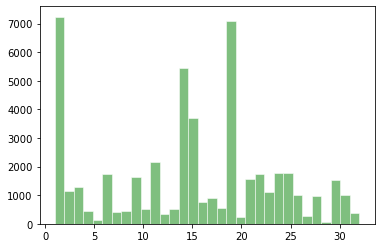

In [312]:
# para ello hacemos el histograma del comportamiento de la variable comportamiento interno 3
plt.hist(base_inicial_int_ext['comp_interno3'],32,edgecolor="white",color="green",alpha=.5)
print('Distribucion del comportamiento de la variable comportamiento_interno_3')
print('Se cuenta con un maximo de :',max(base_inicial_int_ext['comp_interno3']),' productos.')
print('Los productos mas solicitados son aquellos con clave: 1,14,15 y 19')
print('Mientras que los menos populares son aquellos con clave: 5,20 y 29')

In [311]:
Frecuencias_comp_interno3=(base_inicial_int_ext
  .groupby("comp_interno3")
  .agg(frequency=("comp_interno3", "count")))
Frecuencias_comp_interno3

,frequency
comp_interno3,
1.0,7240
2.0,1164
3.0,1270
4.0,434
5.0,134
6.0,1754
7.0,423
8.0,444
9.0,1649


Ahora, realicemos el analisis de la base de comportamiento. Estas bases son de las que más informacion tenemos por lo que nos apoyaremos en las mismas para establecer un criterio de selección

In [315]:
# Ahora bien, juntemos ambas bases de comportamiento
# para ello renombraremos num_caso en la base 3 como num_caso_b3
base_comportamiento_3.rename(columns={'num_caso':'num_caso_b3'},
               inplace=True)
base_comportamiento = pd.concat([base_comportamiento_2,base_comportamiento_3['num_caso_b3'],base_comportamiento_3['comportamiento_j']], axis=1)
base_comportamiento[0:60]

,num_caso,mes_informacion,Tiempo_aparicion,num_caso_b3,comportamiento_j
0,1.0,"2016-04-01,00:00:00",0.0,1,0.0
1,1.0,"2016-05-01,00:00:00",1.0,1,0.0
2,1.0,"2016-06-01,00:00:00",2.0,1,0.0
3,1.0,"2016-07-01,00:00:00",3.0,1,0.0
4,1.0,"2016-08-01,00:00:00",4.0,1,0.0
5,1.0,"2016-09-01,00:00:00",5.0,1,0.0
6,1.0,"2016-10-01,00:00:00",6.0,1,0.0
7,1.0,"2016-11-01,00:00:00",7.0,1,0.0
8,1.0,"2016-12-01,00:00:00",8.0,1,0.0
9,1.0,"2017-01-01,00:00:00",9.0,1,1.0


In [316]:
# Ahora, seria conveniente realizar un analisis sobre  el promedio de comportamiento_j pues nos gustaria saber cuanto es el 
# promedio de adeudos que suelen tener los clientes y el tiempo promedio de duracion de los prestamos
prestamo = base_comportamiento.groupby('num_caso')['Tiempo_aparicion'].count()
# como comportamiento_j muestra valores acumulados no podemos sumar los valores en las columnas para contar el numero
# de adeudos, pues por ejemplo, si un cliente debiera el mes 1 y el mes 2, en la base aparecerian 1 y 2 respectivamente,
# que hace referencia en el primer caso a que debe 1 mensualidad mientras que en el segundo indica que como aun no ha pagado
# debe 2, la primera y la segunda, si sumaramos esta columna, el cliente apareceria con un total de 3 adeudos pues no 
# estariamos considerando que ese 2 indica que debe el actual y el anterior, por lo mismo haremos lo siguiente:

#tomaremos solo aquellos registros tales que el comportamiento_j (los adeudos) son mayores a 0 y contamos sobre esos
# registros agrupados, esto nos indicara correctamente el numero de adeudos totales del cliente j durante la vida de 
# su credito.
adeudos = base_comportamiento[base_comportamiento.comportamiento_j>0].groupby('num_caso')['comportamiento_j'].count()

print('El tiempo promedio de vida de los prestamos es: ',np.mean(prestamo))
print('El numero promedio de adeudo de los clientes es: ',np.mean(adeudos))
print('El numero maximo de adeudos de los clientes es: ',max(adeudos))
# si usaramos la funcion min, nos arrojaria 1 pues solo estamos tomando la parte de la base que es positiva en el 
# comportamiento_j pero durante el analisis hemos podido observar que hay clientes que nunca tuvieron adeudos.
print('El numero minimo de adeudo de los clientes es: ',0)

El tiempo promedio de vida de los prestamos es:  29.508535398588922
El numero promedio de adeudo de los clientes es:  4.263075088182303
El numero maximo de adeudos de los clientes es:  51
El numero minimo de adeudo de los clientes es:  0


Ahora, procedemos con el cruce de nuestras bases prestamo y adeudos 

In [317]:
# Renombraremos la base comportamiento, pues ya se ha podido trabajar sobre la informacion desagregada, manteniendo unicamente
# aquella que nos es de interés.
base_comportamiento = pd.concat([prestamo,adeudos], axis=1)
# como tenemos casos donde nunca hubo adeudos, rellenamos los NaN con 0's
base_comportamiento=base_comportamiento.fillna(0)
base_comportamiento

,Tiempo_aparicion,comportamiento_j
num_caso,,
1.0,62,7.0
7.0,29,9.0
8.0,63,4.0
9.0,15,0.0
10.0,16,1.0
...,...,...
98909.0,2,0.0
98910.0,2,0.0
98912.0,2,0.0


Frecuencia de Adeudos
Media en color negro:  4.263075088182303
Cuantil al 2.5% (linea azul izq):  0.0
Cuantil al 97.5% (linea azul der):  16.0


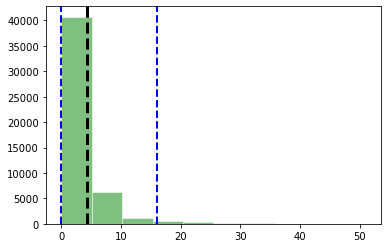

In [318]:
plt.hist(base_comportamiento['comportamiento_j'],edgecolor="white",color="green",alpha=.5)
plt.axvline(np.percentile(base_comportamiento['comportamiento_j'],2.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.percentile(base_comportamiento['comportamiento_j'],97.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(x=4.263075088182303,color='black', linestyle='--',linewidth=3,label="Promedio de adeudo de los clientes")
print("Frecuencia de Adeudos")
print("Media en color negro: ",4.263075088182303)
print("Cuantil al 2.5% (linea azul izq): ",np.percentile(base_comportamiento['comportamiento_j'],2.5))
print("Cuantil al 97.5% (linea azul der): ",np.percentile(base_comportamiento['comportamiento_j'],97.5))

In [319]:
base_comportamiento['% relacion'] = round((base_comportamiento['comportamiento_j']/base_comportamiento['Tiempo_aparicion'])*100,2)  
base_comportamiento

,Tiempo_aparicion,comportamiento_j,% relacion
num_caso,,,
1.0,62,7.0,11.29
7.0,29,9.0,31.03
8.0,63,4.0,6.35
9.0,15,0.0,0.00
10.0,16,1.0,6.25
...,...,...,...
98909.0,2,0.0,0.00
98910.0,2,0.0,0.00
98912.0,2,0.0,0.00


Grafiquemos el comportamiento del % de relacion de adeudos respecto a la vida de los prestamos, pues la propuesta será no autorizar creditos a las personas que rebasen la media.

Frecuencia de Adeudos
Media en color negro:  10.51896115481357
Cuantil al 2.5% (linea azul izq):  0.0
Cuantil al 97.5% (linea azul der):  48.39


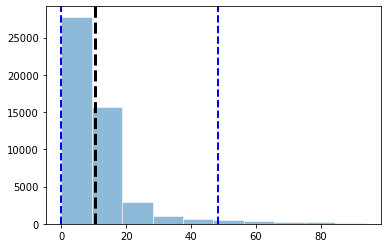

In [322]:
plt.hist(base_comportamiento['% relacion'],edgecolor="white",alpha=.5)
plt.axvline(np.percentile(base_comportamiento['% relacion'],2.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.percentile(base_comportamiento['% relacion'],97.5),color="blue",linestyle="--",linewidth=2)
plt.axvline(np.mean(base_comportamiento['% relacion']),color='black', linestyle='--',linewidth=3,label="Promedio de adeudo de los clientes")
print("Frecuencia de Adeudos")
print("Media en color negro: ",np.mean(base_comportamiento['% relacion']))
print("Cuantil al 2.5% (linea azul izq): ",np.percentile(base_comportamiento['% relacion'],2.5))
print("Cuantil al 97.5% (linea azul der): ",np.percentile(base_comportamiento['% relacion'],97.5))

Si consideramos estas bases como el historial crediticio de nuestros clientes, podemos considerar que un buen cliente sería aquel tal que el numero de adeudos durante el tiempo de vida de sus creditos anteriores no rebase el promedio de adeudos de 10.52%

In [269]:
base_comportamiento['credito'] = base_comportamiento['% relacion'] < 10.52 
base_comportamiento

,Tiempo_aparicion,comportamiento_j,% relacion,credito
num_caso,,,,
1.0,62,7.0,11.29,False
7.0,29,9.0,31.03,False
8.0,63,4.0,6.35,True
9.0,15,0.0,0.00,True
10.0,16,1.0,6.25,True
...,...,...,...,...
98909.0,2,0.0,0.00,True
98910.0,2,0.0,0.00,True
98912.0,2,0.0,0.00,True


Finalmente, analicemos las bases de inversion:

In [323]:
# Por un lado, notemos que la base inversion contiene unicamente la informacion de la inversion del cliente asociado a 
# la llave _id2_, por lo que podemos utilizar la base_ini_parte1 para el cruce de informacion.
base_inversion

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354
...,...,...
17531,907442,2.660128
17532,231978,65.614854
17533,794742,25.169510
17534,209898,730.952882


In [325]:
base_ini_parte1

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318
...,...,...,...
49995,78795,1812285,0.34318
49996,9126,209898,0.38000
49997,44847,1031481,0.34000
49998,87200,2005600,0.26984


El componente mixto 1 sabemos que hace referencia al comportamiento del cliente dentro y fuera de la informacion de la
empresa, sinembargo no tenemos conocimiento sobre su calculo o la informacion exacta a la que refiere, motivo por el cual no
podemos realizar inferencia sobre este dato.

In [332]:
# Hacemos el cruce de las bases iniciales
# primero hacemos el cruce de la base_inicial_int_ext con la base incial parte 1 para asocial a cada _id_ su _id2_
bases_ini_inv = pd.merge(base_inicial_int_ext,base_ini_parte1, on="_id_")
# ahora que la base_inicial_int_ext tiene asociada la llave _id2_ podemos unir la base inversion a la misma 
bases_inv = pd.merge(base_ini_parte1,base_inversion, on="_id2_")

In [336]:
bases_ini_inv=pd.merge(base_inicial_int_ext,bases_inv, on="_id_")
bases_ini_inv=bases_ini_inv.drop(['_id2_'], axis=1)
bases_ini_inv

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion
0,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,0.33334,0.041039
1,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,0.27318,77.422135
2,45732,2018-07-27,3546.099291,b'1',15.0,70.0,1.0,9.0,160.0,640.579710,63.487504,81.0,-230.0,0.32988,90.539953
3,53185,2018-09-07,759.878419,b'1',23.0,58.0,1.0,9.0,168.0,200.000000,19.821890,109.0,-230.0,0.37000,90.205018
4,82374,2020-06-24,0.000000,b'1',22.0,61.0,1.0,9.0,167.0,214.202899,21.229532,37.0,-230.0,0.31664,1.071354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17531,39454,2018-02-14,1215.805471,b'1',2.0,48.0,2.0,11.0,147.0,6.666667,0.000000,128.0,-230.0,0.36136,2.660128
17532,10086,2016-06-23,0.000000,b'1',19.0,63.0,1.0,8.0,164.0,185.518841,18.386670,57.0,-230.0,0.37614,65.614854
17533,34554,2017-09-25,0.000000,b'1',11.0,48.0,2.0,9.0,156.0,159.420290,15.800057,102.0,-230.0,0.29524,25.169510
17534,9126,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0,0.38000,730.952882


##### Como conclusión
Se puede generar un modelo lineal como modelo de clasificacion que nos permita identificar si un cliente es riesgoso o no con el fin de responder la pregunta de si se otorga un credito bancario o no, al menos en primer instancia esta sería una forma de atacar el problema, sin embargo es necesario conocer informacion precisa sobre las variables para el ajuste de un modelo. En el trabajo se ha decidido tomar el criterio de no otorgar credito a clientes cuyo porcentaje de relacion entre adeudos y la vida del crédito sea mayor al promedio (10.52%).